In [1]:
import numpy as np
import prtools as pr 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from jupyterthemes import jtplot
jtplot.style(theme="grade3")

# Exercise 6.1

$C_{100}^5=75,287,520$

In [2]:
from scipy.special import comb
print(comb(100,5))

75287520.0


# Exercise 6.2

$XX^T = C$, $X$ is central mean

$AX(AX)^T = AXX^TA^T = ACA^T$

Hints: $(AB)^T = B^TA^T$

# Exercise 6.3~6.6

you should know that $S_m = S_w + S_B$ for a fact

$m,\Sigma$: mean and covariance of all samples

$m_i,\Sigma_i$: mean and covariance of class i

Within-scatter: $S_w = \sum_{i=1}^C \frac{n_i}{n} \Sigma_i$

Between-scatter: $S_B = \sum_{i=1}^C \frac{n_i}{n}(m_i-m)(m_i-m)^T$

# Exercise 6.7

(a) 

The orthogonal line of the line across the points belonging to the same class.

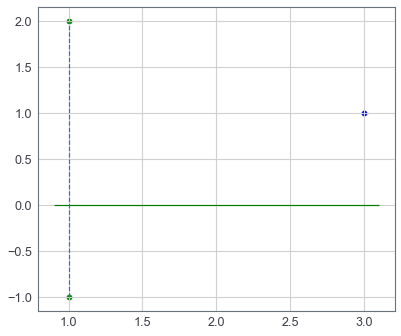

In [3]:
a = np.array([[1,-1], [1,2]])
b = np.array([3,1])
plt.scatter(a[:,0], a[:,1], c="green")
plt.scatter(b[0], b[1], c="blue")
plt.plot(a[:,0], a[:,1], linestyle="dashed")
plt.hlines(0, 0.9, 3.1,colors="green")
plt.show()

(b)

The orthogonal line of the plane constituted by the three points belonging to the same class. 

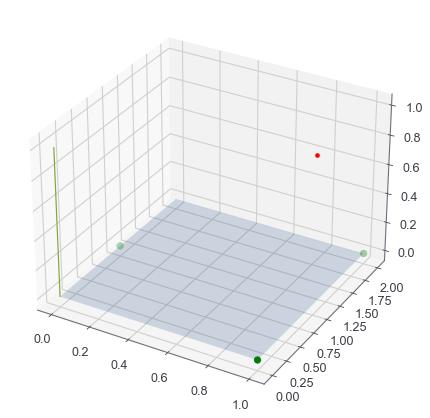

In [4]:
a = np.array([[1,0,0], [0,1,0], [1,2,0]])
b = np.array([1,1,1])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(a[:,0], a[:,1], a[:,2], c="green", s=50)
ax.scatter(b[0], b[1], b[2], c="red")
X, Y = np.meshgrid(a[:,0], a[:,1])
Z = np.array([a[:,2]])
ax.plot_surface(X, Y, Z, alpha=0.1)
ax.plot(np.array([0,0]),np.array([0,0]),np.array([0,1]))
plt.show()

(c)

It cannot always find Fisher 1D subspace, as it requires $S_W \to 0$ (all the points from the same class can project to a single point), which means that $J(a)=S_W^{-1}S_B$ tends to infinite.

(d)

The answer cannot be defined which can be zero or go to infinite.

# Exercise 6.8

## PCA Procedure:
1. Centralize the sample (very important)
$$x_i=x_i-\frac{1}{n} \sum_{j=1}^n x_j$$
2. Calculate the covariance matrix
$$C=\frac{1}{n}XX^T$$
3. Calculate the eigenvector and eigenvalue
4. Choose the frist several eigenvectors according to the ranking of eigenvalues (from large to small)
5. Constitute the eigenvectors as row to be a new matrix P
6. Lower dimensional $X_{new} = PX$ 

## PCA Example:
The example is from the trial exam:

In [5]:
C = np.array([[1,0,0], [0,2,0], [0,0,4]])

In [6]:
# Calculate the eigenvector and eigenvalue

value, vector = np.linalg.eig(C)

print("eigenValue: ", value)
print("eigenVector: \n", vector)

eigenValue:  [1. 2. 4.]
eigenVector: 
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Therefore, The first princeple component is [0,0,1]. The direction is the thrid dimension

In [7]:
T = np.array([[1,0,0], [0,0.5,-np.sqrt(3)/2], [0,np.sqrt(3)/2,0.5]])
C_trans = T.dot(C).dot(T.T) # see exercise 6.2
print(C_trans)

[[ 1.         0.         0.       ]
 [ 0.         3.5       -0.8660254]
 [ 0.        -0.8660254  2.5      ]]


In [8]:
# Calculate the eigenvector and eigenvalue, again

value_trans, vector_trans = np.linalg.eig(C_trans)

print("New eigenValue: ", value_trans)
print("New eigenVector: \n", vector_trans)

New eigenValue:  [2. 4. 1.]
New eigenVector: 
 [[ 0.         0.         1.       ]
 [-0.5       -0.8660254  0.       ]
 [-0.8660254  0.5        0.       ]]


The give answer is [0, 0.8660254, -0.5]. This is the same as [0, -0.8660254, 0.5]. We don't care about the direction. 

(a)

see exercise 6.2 (This only holds for zero-mean samples)

(b)

<img src="./week6_figure/PCA.PNG" width="75%">

# Exercise 6.9~6.12

# Exercise 6.13

(a)

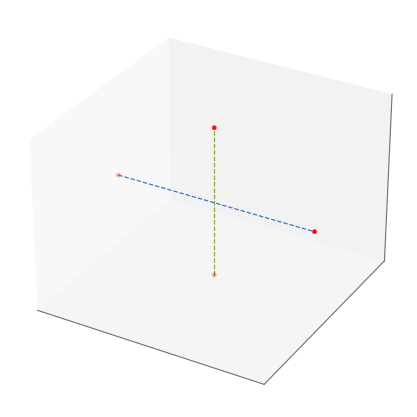

In [9]:
mean = np.array([[-5,0,0], [5,0,0], [0,0,3], [0,0,-3]])
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zticks([-6,6])
ax.set_xticks([-6,6])
ax.set_yticks([-6,6])
ax.scatter(mean[:,0], mean[:,1], mean[:,2], s=20, c="red")
plt.plot([-5,5], [0,0] ,[0,0], linestyle="dashed")
plt.plot([0,0], [0,0] ,[-3,3], linestyle="dashed")
plt.show()

PCA direction: (1,0,0)

(b)

(1,0,0)

(c)

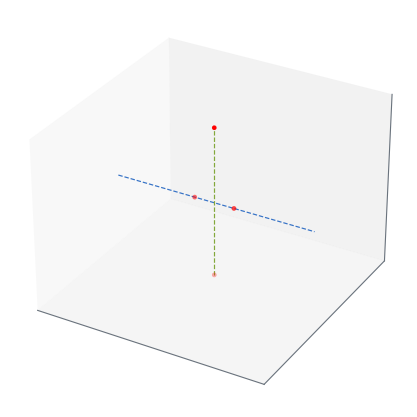

In [10]:
mean = np.array([[-5,0,0], [5,0,0], [0,0,3], [0,0,-3]])
mean[:,0] = mean[:,0]/4
fig = plt.figure()
ax = Axes3D(fig)
ax.set_zticks([-6,6])
ax.set_xticks([-6,6])
ax.set_yticks([-6,6])
ax.scatter(mean[:,0], mean[:,1], mean[:,2], s=20, c="red")
plt.plot([-5,5], [0,0] ,[0,0], linestyle="dashed")
plt.plot([0,0], [0,0] ,[-3,3], linestyle="dashed")
plt.show()

<b>2D PCA</b> will no change, it will still be xz plane.

(d)

- PCA: Perform dimensionality reduction while preserving as much of the variance in the high dimensional space as possible.
- LDA: Perform dimensionality reduction while preserving as much of the class discriminatory information as possible.

The within scatter will be rather unstable & the second dimension does not contain any discriminatory information $\to$ Fisher LDA will not be the best.

Therefore, PCA will therefore be better in general.

Conclusion: PCA can work for both small and large dataset, while LDA is limited for the small dataset.

# Exercise 6.14
https://quantifyinghealth.com/stepwise-selection/

(a)

* Start with empty feature set
* One at a time, keep adding feature that gives best performance considering entire chosen feature set

0 -> 5, we need 20+19+18+17+16=90 criterions

(b)

* Start with full feature set
* One at a time, keep reducing feature that gives best performance considering entire chosen feature set

20 -> 5, we need 20+19+18+...+6=195 criterions

In [11]:
# (c)
comb(20,5)

15504.0

(d)

I will use (a), the simplest one.

# Exercise 6.15~16

# Exercise 6.17

(a)

10+9+8 = 27

(b)

10+9+...+4 = 49

(c)

$C_{10}^3 = 120$

(d)

$\sum_{i=1}^{10} C_{10}^i = 2^{10}-1 = 1023$

(e) For NMC the number of copies might matter

For the Fisher classifier: $C_{10}^3 + C_{10}^2 + C_{10}^1 = 175$

For the NMC: $C_{10}^3 + C_{10}^2\cdot C_2^1 + C_{10}^1 = 220$

# Exercise 6.18


In [12]:
comb(100,5)

75287520.0

# Exercise 6.19

(a)

maha-s: the sum of Mahalanobis distances

Mahalanobis distances are the same as the Euclidean distance, but they have a correction based on some covariance. Specifically for this exercise, the Mahalanobis distance between two classes based on the two class mean m1 and m2 is given by $(m_1-m_2)S_W^{-1}(m_1-m_2)$

In [13]:
# help(pr.featself) -- feature forward selection
# help(pr.featselb) -- feature backward selection
help(pr.featseli) # -- Individual Feature Selector

Help on function featseli in module prtools.prtools:

featseli(task=None, x=None, w=None)
    Individual Feature Selector
    
           w = featseli(A, (K,CRIT))
    
    Individual feature selection of K features using the dataset A. The
    criterion is defined by CRIT; for more information for possible
    criteria, see FEATEVAL.
    
    Example:
    a = gendat()
    w = featseli(a, (4,ldc()))



In [14]:
data = pr.gendatd(100, dim=10)
print((+data)[1])

[ 0.28728175 -0.99341371 -4.66981383 -5.93452085 -0.34178508 -3.0493335
 -5.36699788 -9.43300701  2.80913515  0.62797749]


In [15]:
wF = pr.featself(data, (2, 'maha-s'))
wB = pr.featselb(data, (2, 'maha-s'))
wI = pr.featseli(data, (2, 'maha-s'))
dataF = wF(data)
dataB = wB(data)
dataI = wI(data)

print((+dataF)[1], ': feature 0 and 1', '\n')
print((+dataB)[1], ': feature 8 and 9', '\n')
print((+dataI)[1], ': feature 0 and 1', '\n')

[ 0.28728175 -0.99341371] : feature 0 and 1 

[2.80913515 0.62797749] : feature 8 and 9 

[ 0.28728175 -0.99341371] : feature 0 and 1 



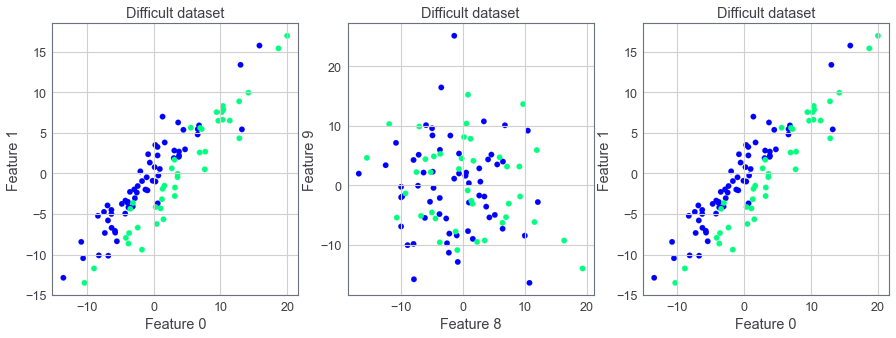

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(131)
pr.scatterd(dataF)
plt.subplot(132)
pr.scatterd(dataB)
plt.subplot(133)
pr.scatterd(dataI)

(b)

featself and featseli both select the optimal one, while featselb does not.

# Exercise 6.20

(a)

In [17]:
data = pr.read_mat("diabetes")
print("data shape: ", data.shape)

data shape:  (768, 8)


In [18]:
print("Class: ", np.unique(data.nlab(), return_counts=True))

Class:  (array([0, 1], dtype=int64), array([500, 268], dtype=int64))


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(+data, data.nlab(), test_size=0.5, random_state=40)

In [21]:
#Personally, I prefer using SKLearn to PRTools.
#But If you want to use PRTools, you can use the following sets and
#use pr.fisherc() to train and eval the training set and testing set respectively,
#and use pr.testc() to get the error rate.

# train = pr.prdataset(x_train, targets=y_train)
# test = pr.prdataset(x_test, targets=y_test)
# print("training data shape: ", train.shape)
# print("testing data shape: ", test.shape)

In [22]:
from itertools import combinations

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [23]:
c = list(combinations([0,1,2,3,4,5,6,7], 5))
print(c[:5])

[(0, 1, 2, 3, 4), (0, 1, 2, 3, 5), (0, 1, 2, 3, 6), (0, 1, 2, 3, 7), (0, 1, 2, 4, 5)]


In [24]:
w = LinearDiscriminantAnalysis()
max_acc = 0
for i in range(comb(8,5).astype(np.int)):
    w.fit(x_train[:,list(c[i])], y_train)
    acc = accuracy_score(y_test, w.predict(x_test[:,list(c[i])]))
    if acc > max_acc:
        max_acc = acc
        best_feat = c[i]

In [25]:
print("The best 5 features: ", best_feat)
print("The accuracy is ", max_acc)

The best 5 features:  (1, 2, 3, 5, 6)
The accuracy is  0.7786458333333334


(b)

the best five features are (1, 2, 3, 5, 6)

(c)

the error rate is 1-max_acc = 0.221

(d)

If not, do at least the error rates on the test set come close in case one uses the same classifier?

↑ what does it mean?

In [26]:
pr.feateval(data,pr.ldc())

0.21614583333333334

(e)

change the value of random_state, you may obtain a different result.

# Exercise 6.21~6.24

# Exercise 6.25

<b>Bagging</b>: the idea of combining classifier outcomes

装袋算法是并行式集成学习的代表，其原理也比较简单。算法步骤如下：

1. 数据处理：将数据根据实际情况进行清洗整理
2. 随机采样：重复 T 次，每一次从样本中随机选出 T 个子样本。
3. 个体训练：将每一个子样本放入个体学习器训练。
4. 分类决策：用投票法集成进行分类决策。

## SKLearn Version

In [27]:
data = pr.gendats((10,10))
# data = pr.gendatd((10,10))

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [29]:
w_bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=1),
                  n_estimators=10,
                  random_state=40
                 ).fit(+data, data.nlab())

In [30]:
acc = w_bagging.score(+data, data.nlab())
print(acc)

0.95


In [31]:
w = KNeighborsClassifier(n_neighbors=1).fit(+data, data.nlab())
print(w.score(+data, data.nlab()))

1.0


## PRTools Version


error rate:  0.2


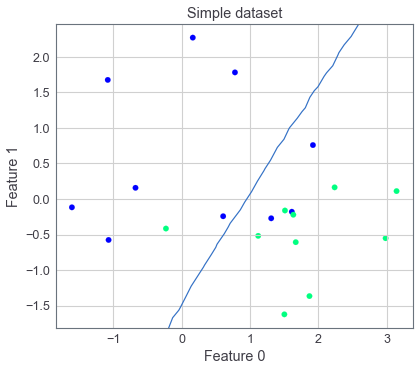

In [32]:
data = pr.gendats((10,10))
w = pr.baggingc(task=data, w=pr.knnc([], 1))
print("error rate: ", pr.testc(w.eval(data)))
pr.scatterd(data)
pr.plotc(w)

error rate:  0.3


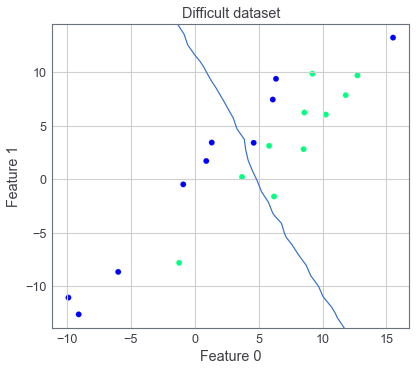

In [33]:
data = pr.gendatd((10,10))
w = pr.baggingc(task=data, w=pr.knnc([], 1))
print("error rate: ", pr.testc(w.eval(data)))
pr.scatterd(data)
pr.plotc(w)

# Exercise 6.26~6.28

# Exercise 6.29
AdaBoost 算法与 Boosting 算法不同的是，其不需要预先知道弱分类器的误差，并且最后得到的强分类器的分类精度依赖于所有弱分类器的分类精度。

Adaboost 算法流程：

1. 数据准备：通过数据清理和数据整理的方式得到符合规范的数据。
2. 初始化权重：如果有 N 个训练样本数据，在最开始时每一个数据被赋予相同的权值：1/N。
3. 弱分类器预测：将有权重的训练样本放入弱分类器进行分类预测。
4. 更改权重：如果某个样本点被准确地分类，降低其权值；若被分类错误，那么提高其权值。然后，权值更新过的样本集被用于训练下一个分类器。
5. 强分类器组合：重复 3，4 步骤，直至训练结束，加大分类误差率小的弱分类器的权重（这里的权重和样本权重不一样），使其在最终的分类函数中起着较大的决定作用，降低分类误差率大的弱分类器的权重，使其在最终的分类函数中起着较小的决定作用，最终输出结果。

A decision stump is a machine learning model consisting of a one-level decision tree.[1]

In [34]:
data = pr.gendatb((100,100))

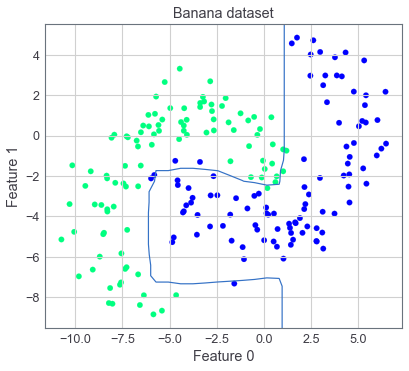

In [35]:
pr.scatterd(data)
w = pr.adaboostc(task=data, w=(pr.stumpc,1,[],0))
pr.plotc(w)

1. Bagging for regression: https://www.youtube.com/watch?v=5Lu1eTiX7qM&ab_channel=mathematicalmonk
2. Bagging for classification: https://www.youtube.com/watch?v=JM4Y0B6Ho90&ab_channel=mathematicalmonk
3. (Optional) Random Forest: https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&ab_channel=StatQuestwithJoshStarmer
4. AdaBoost: https://www.youtube.com/watch?v=LsK-xG1cLYA&ab_channel=StatQuestwithJoshStarmer